In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import random
from bishoy1 import program1
from bishoy2 import program2

sns.set_theme()

In [26]:
def generate_unimodal_input(n: int, W: int):
    """
    Generate random unimodal input with n paintings and platform width W.
    Heights follow a unimodal sequence: first decreasing, then increasing.
    Widths are random integers between 1 and W//2 to ensure the width constraint.
    """
    min_index = random.randint(1, n-2)  # Ensure there's a valid turning point
    decreasing_part = sorted([random.randint(1, 100) for _ in range(min_index)], reverse=True)
    increasing_part = sorted([random.randint(1, 100) for _ in range(n - min_index)], reverse=False)
    heights = decreasing_part + increasing_part
    widths = [random.randint(1, W // 2) for _ in range(n)]
    return heights, widths

In [27]:
def measure_runtime(program_func, n: int, W: int, heights: list[int], widths: list[int]):
    """
    Measure the execution time of a program function (program1 or program2).
    """
    start_time = time.time()
    program_func(n, W, heights, widths)
    end_time = time.time()
    return end_time - start_time

In [28]:
n_values = [1000, 2000, 3000, 4000, 5000, 7500, 10000, 12250, 15000, 30000]  # Different input sizes
runs_per_n = 20  # Number of datasets per input size
W = 10  # Platform width
program1_times = []
program2_times = []


In [29]:
for n in n_values:
    print(f"Running experiments for n = {n}...")

    # Initialize variables to accumulate times for multiple runs
    total_time_p1 = 0
    total_time_p2 = 0

    # Run 5 experiments for each n
    for _ in range(runs_per_n):
        heights, widths = generate_unimodal_input(n, W)
        
        # Measure runtime for Program1
        time_p1 = measure_runtime(program1, n, W, heights, widths)
        total_time_p1 += time_p1

        # Measure runtime for Program2
        time_p2 = measure_runtime(program2, n, W, heights, widths)
        total_time_p2 += time_p2

    # Compute the average time over the 5 runs
    avg_time_p1 = total_time_p1 / runs_per_n
    avg_time_p2 = total_time_p2 / runs_per_n

    # Store the average times
    program1_times.append(avg_time_p1)
    program2_times.append(avg_time_p2)

Running experiments for n = 1000...
Running experiments for n = 2000...
Running experiments for n = 3000...
Running experiments for n = 4000...
Running experiments for n = 5000...
Running experiments for n = 7500...
Running experiments for n = 10000...
Running experiments for n = 12250...
Running experiments for n = 15000...
Running experiments for n = 30000...


In [30]:
times = pd.DataFrame(data = {"N" : n_values,
                             "Algorithm 1 Time": program1_times, 
                             "Algorithm 2 Time": program2_times})
times

,N,Algorithm 1 Time,Algorithm 2 Time
0,1000,0.000049,0.000150
1,2000,0.000346,0.005864
2,3000,0.000246,0.011852
3,4000,0.000438,0.019895
4,5000,0.000850,0.039175
5,7500,0.001002,0.093939
6,10000,0.001403,0.150041
7,12250,0.004803,0.229877
8,15000,0.002198,0.276578
9,30000,0.004543,1.360281


Text(0.5, 1.0, 'Algorithm 1 Time Complexity Demonstration')

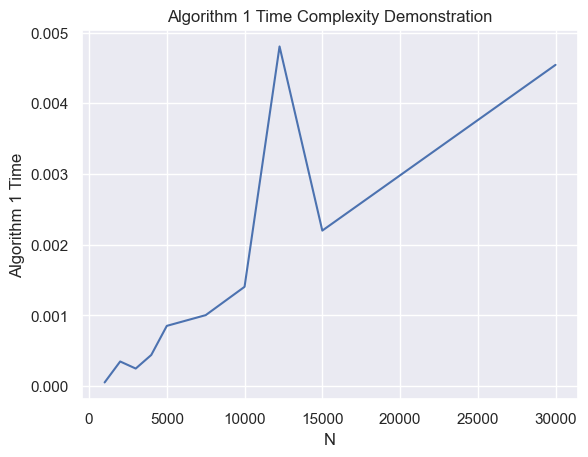

In [31]:
sns.lineplot(x = times["N"], y = times['Algorithm 1 Time'])
plt.title("Algorithm 1 Time Complexity Demonstration")

(0.0, 0.05)

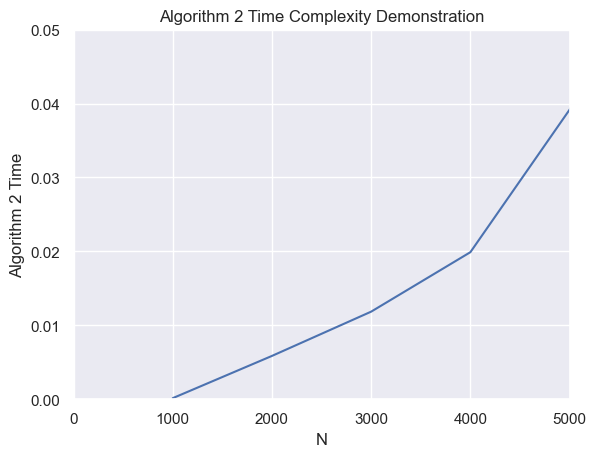

In [36]:
sns.lineplot(x = times["N"], y = times['Algorithm 2 Time'])
plt.title("Algorithm 2 Time Complexity Demonstration")
plt.xlim(0,5000)
plt.ylim(0,0.05)

Text(0.5, 1.0, 'Algorithm 2 Time Complexity Demonstration')

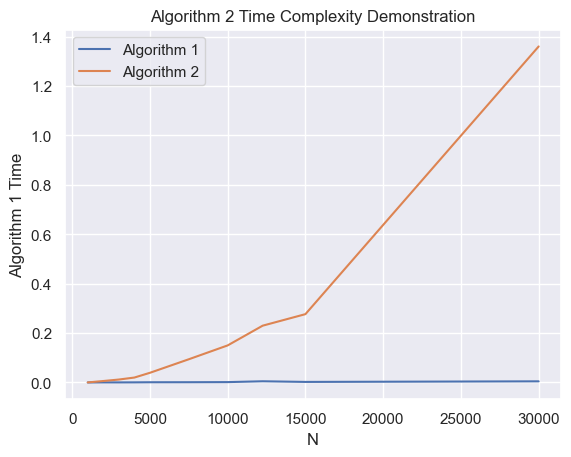

In [33]:
sns.lineplot(x = times["N"], y = times['Algorithm 1 Time'], label = "Algorithm 1")
sns.lineplot(x = times["N"], y = times['Algorithm 2 Time'], label = "Algorithm 2")
plt.title("Algorithm 2 Time Complexity Demonstration")
